<h1 style="text-align:center;">Лабораторная работа №1</h1>

<h3 style="text-align:center;">Глушнёв Крилл Николаевич</h3>
<h3 style="text-align:center;">Б01-204</h3>

Цель: построить графики абсолютной погрешности каждого метода в зависимости от шага численного дифференцирования $h_n = \frac{2}{2^n}$ для $n=1..21$ для набора из 5 функций:
$sin(x^2), \space\space cos(sin(x)), \space\space exp(sin(cos(x))), \space\space ln(x+3), \space\space \sqrt{x+3}.$ <br>

Точку $x$ выберем случайно, а сравнивать вычисленную по обычной формуле производную будем с вычисленной численным методом по 5 формулам: 
1. $$\frac{f(x+h) - f(x)}{h}$$
2. $$\frac{f(x) - f(x-h)}{h}$$
3. $$\frac{f(x+h) - f(x-h)}{h}$$
4. $$\frac{4}{3}\frac{f(x+h)-f(x-h)}{2h} - \frac{1}{3}\frac{f(x+2h)-f(x-2h)}{4h}$$
5. $$\frac{3}{2}\frac{f(x+h)-f(x-h)}{2h} -\frac{3}{5}\frac{f(x+2h)-f(x-2h)}{4h} + \frac{1}{10}\frac{f(x+3h)-f(x-3h)}{6h}$$

Результатом исследования будут графики абсолютной погрешности - разности аналитического и численного расчета производных в зависимости от размера $h$ в численном методе.

In [10]:
# Подключение библиотек

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Формулы для численного вычисления производной

def der1(f, x0, h):
    return (f(x0 + h) - f(x0))/h

def der2(f, x0, h):
    return (f(x0) - f(x0 - h))/h

def der3(f, x0, h):
    return (f(x0 + h) - f(x0 - h))/(2 * h)

def der4(f, x0, h):
    return 4/3 * (f(x0 + h) - f(x0 - h))/(2*h) - 1/3 * (f(x0 + 2*h) - f(x0 - 2*h))/(4*h)

def der5(f, x0, h):
    return 3/2 * (f(x0 + h) - f(x0 - h))/(2*h) - 3/5 * (f(x0 + 2*h) - f(x0 - 2*h))/(4*h) + 1/10 * (f(x0 + 3*h) - f(x0 - 3*h))/(6*h)

In [3]:
n = np.arange(1, 22)
h = 2/(2**n)

#### 1) $sin(x^2)$
Функция $f_1 = sin(x^2)$, ее производная $f'_1 = 2xcos(x^2)$

In [11]:
def f1(x):
    return np.sin(x**2)

In [12]:
x1_0 = (15/360) * 2 * np.pi
der_t1 = 2 * x1_0 * np.cos(x1_0**2)

In [13]:
def der_delta(f, der, x0, h, der_t):
    return abs(der(f, x0, h) - der_t)

delta1 = [der_delta(f1, der1, x1_0, dx, der_t1) for dx in h]
delta2 = [der_delta(f1, der2, x1_0, dx, der_t1) for dx in h]
delta3 = [der_delta(f1, der3, x1_0, dx, der_t1) for dx in h]
delta4 = [der_delta(f1, der4, x1_0, dx, der_t1) for dx in h]    
delta5 = [der_delta(f1, der5, x1_0, dx, der_t1) for dx in h]

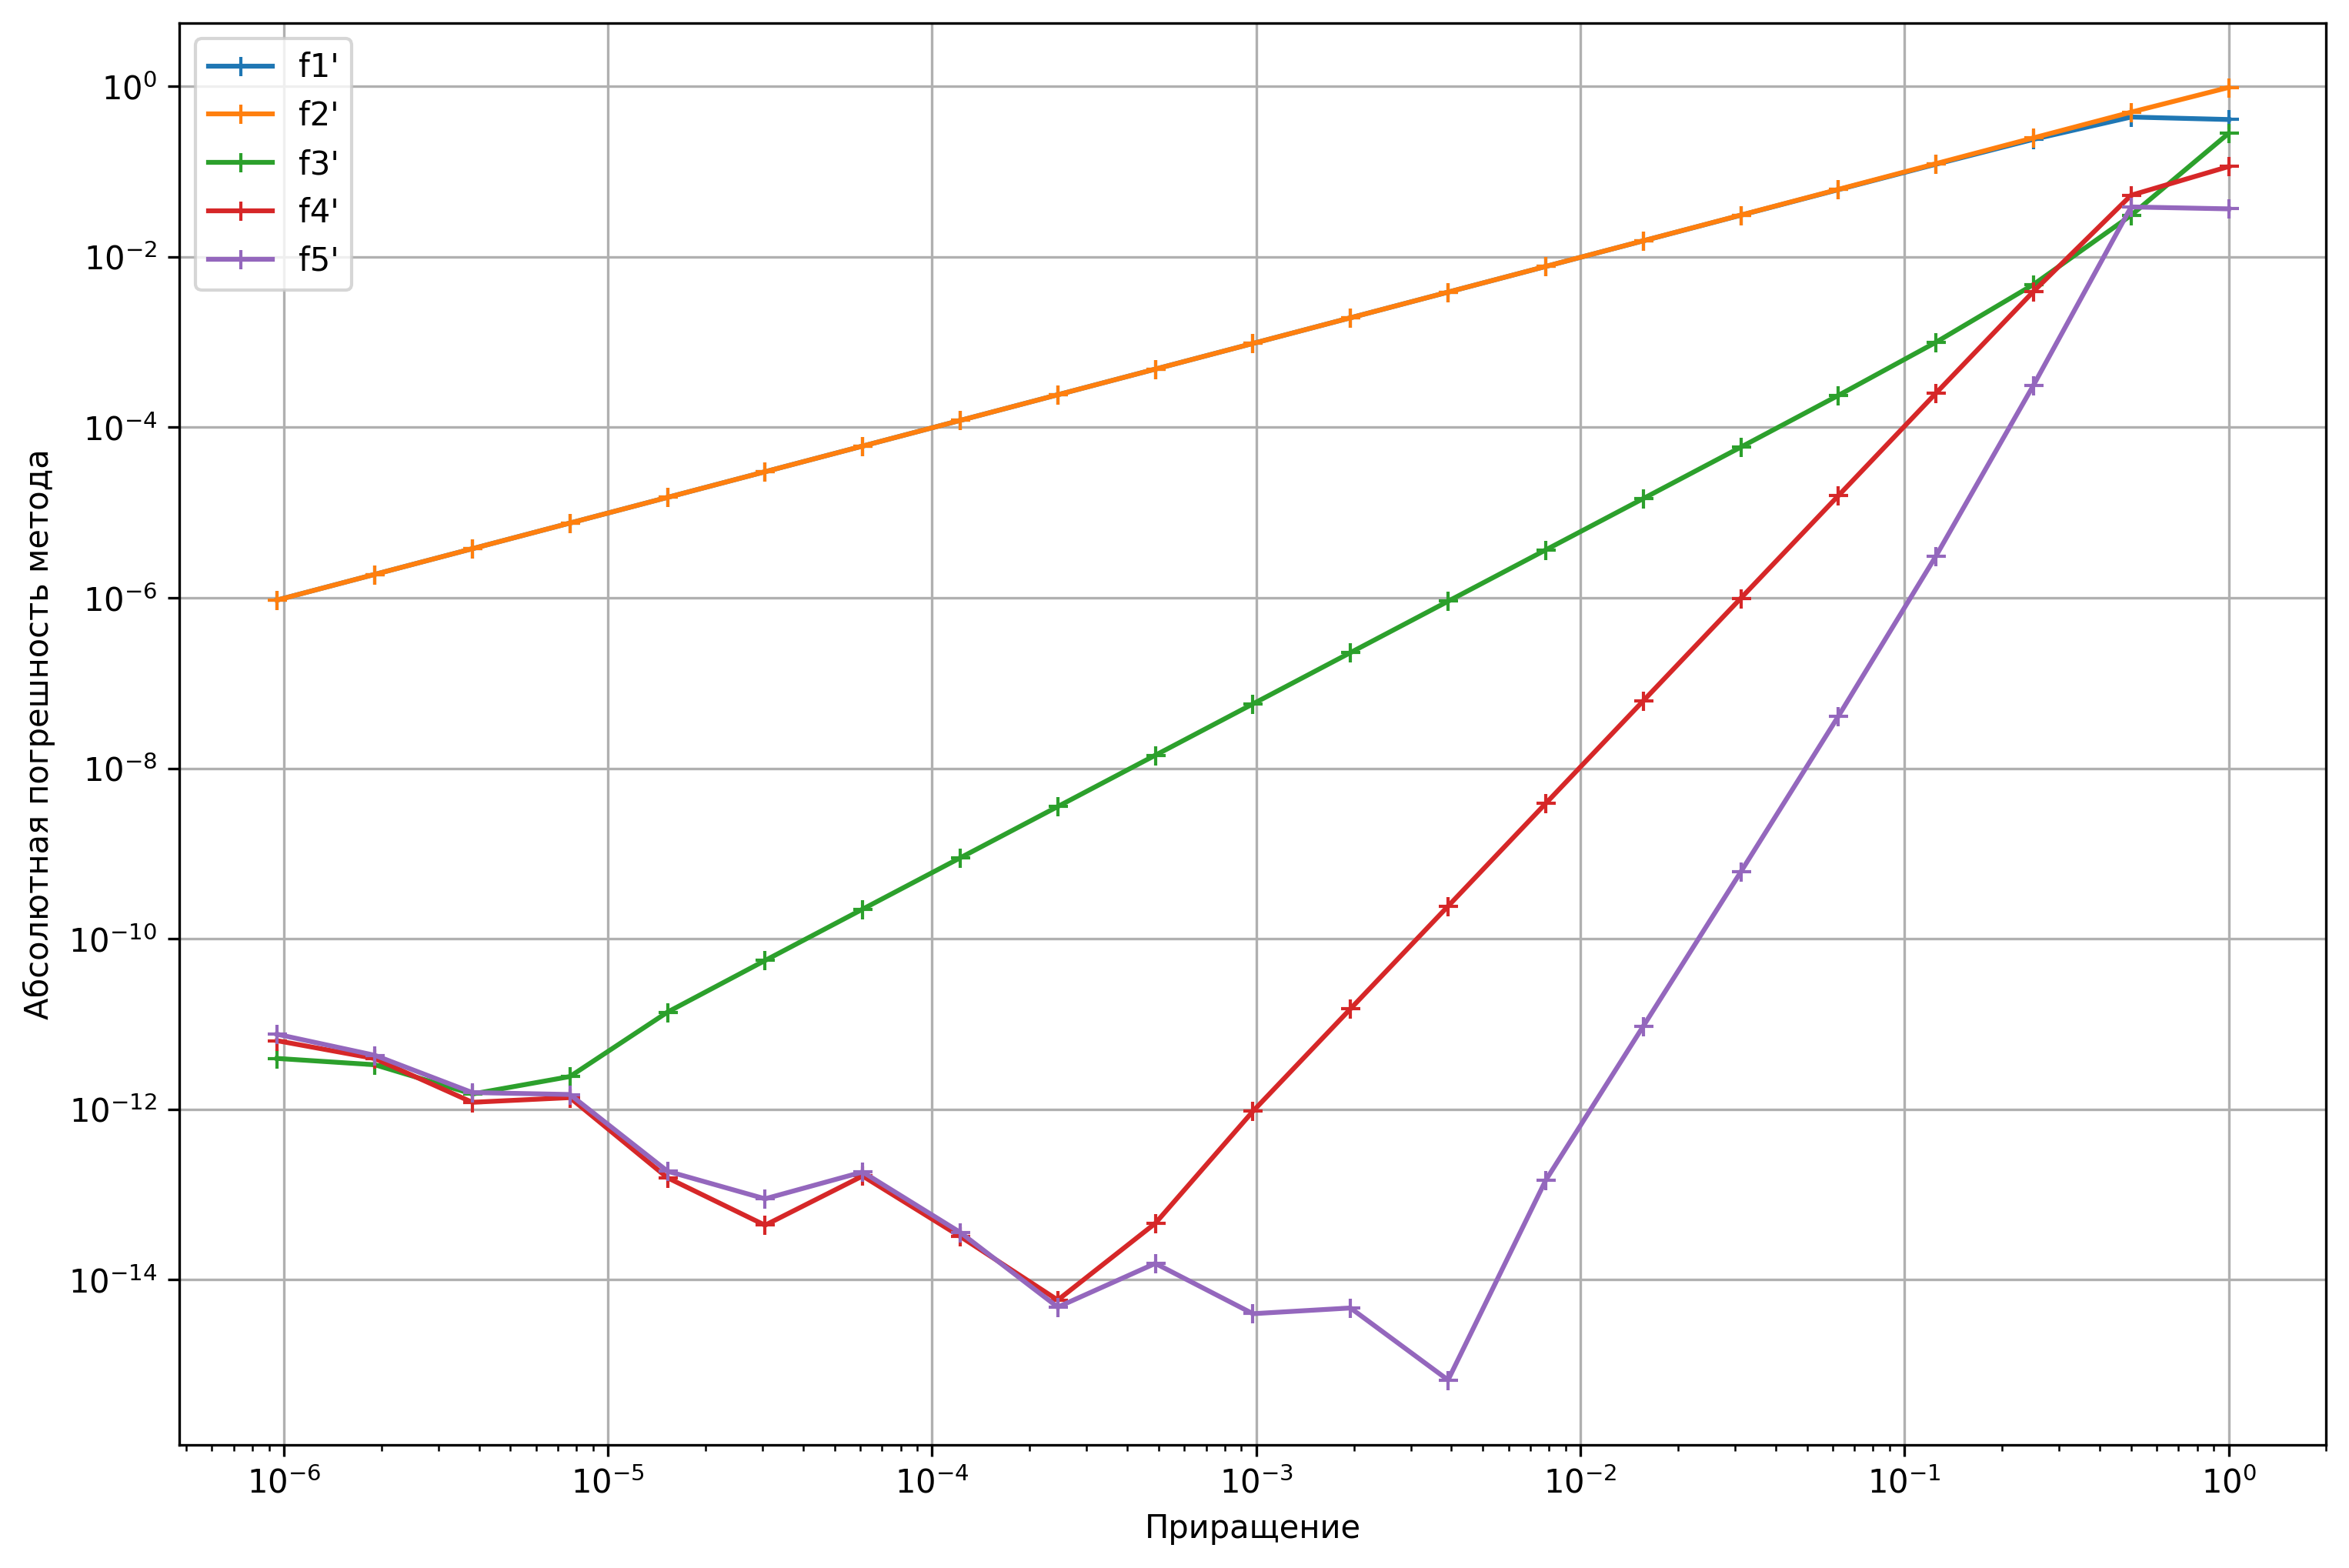

In [14]:
plt.figure(figsize = [12,8], dpi = 300)

plt.plot(h, delta1, marker = '+', label = "f1'")
plt.plot(h, delta2, marker = '+', label = "f2'")
plt.plot(h, delta3, marker = '+', label = "f3'")
plt.plot(h, delta4, marker = '+', label = "f4'")
plt.plot(h, delta5, marker = '+', label = "f5'")

plt.xlabel('Приращение')
plt.ylabel('Абсолютная погрешность метода')

plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.grid()
plt.show()

#### 2) $cos(sin(x))$
Функция $f_2 = cos(sin(x))$, ее производная $f'_2 = -cos(x)sin(sin(x))$

In [361]:
def f2(x):
    return np.cos(np.sin(x))

In [363]:
x2_0 = (15/360) * 2 * np.pi
der_t2 = -1 * np.cos(x2_0) * np.sin(np.sin(x2_0))

In [373]:
delta2_1 = [der_delta(f2, der1, x2_0, dx, der_t2) for dx in h]
delta2_2 = [der_delta(f2, der2, x2_0, dx, der_t2) for dx in h]
delta2_3 = [der_delta(f2, der3, x2_0, dx, der_t2) for dx in h]
delta2_4 = [der_delta(f2, der4, x2_0, dx, der_t2) for dx in h]    
delta2_5 = [der_delta(f2, der5, x2_0, dx, der_t2) for dx in h]

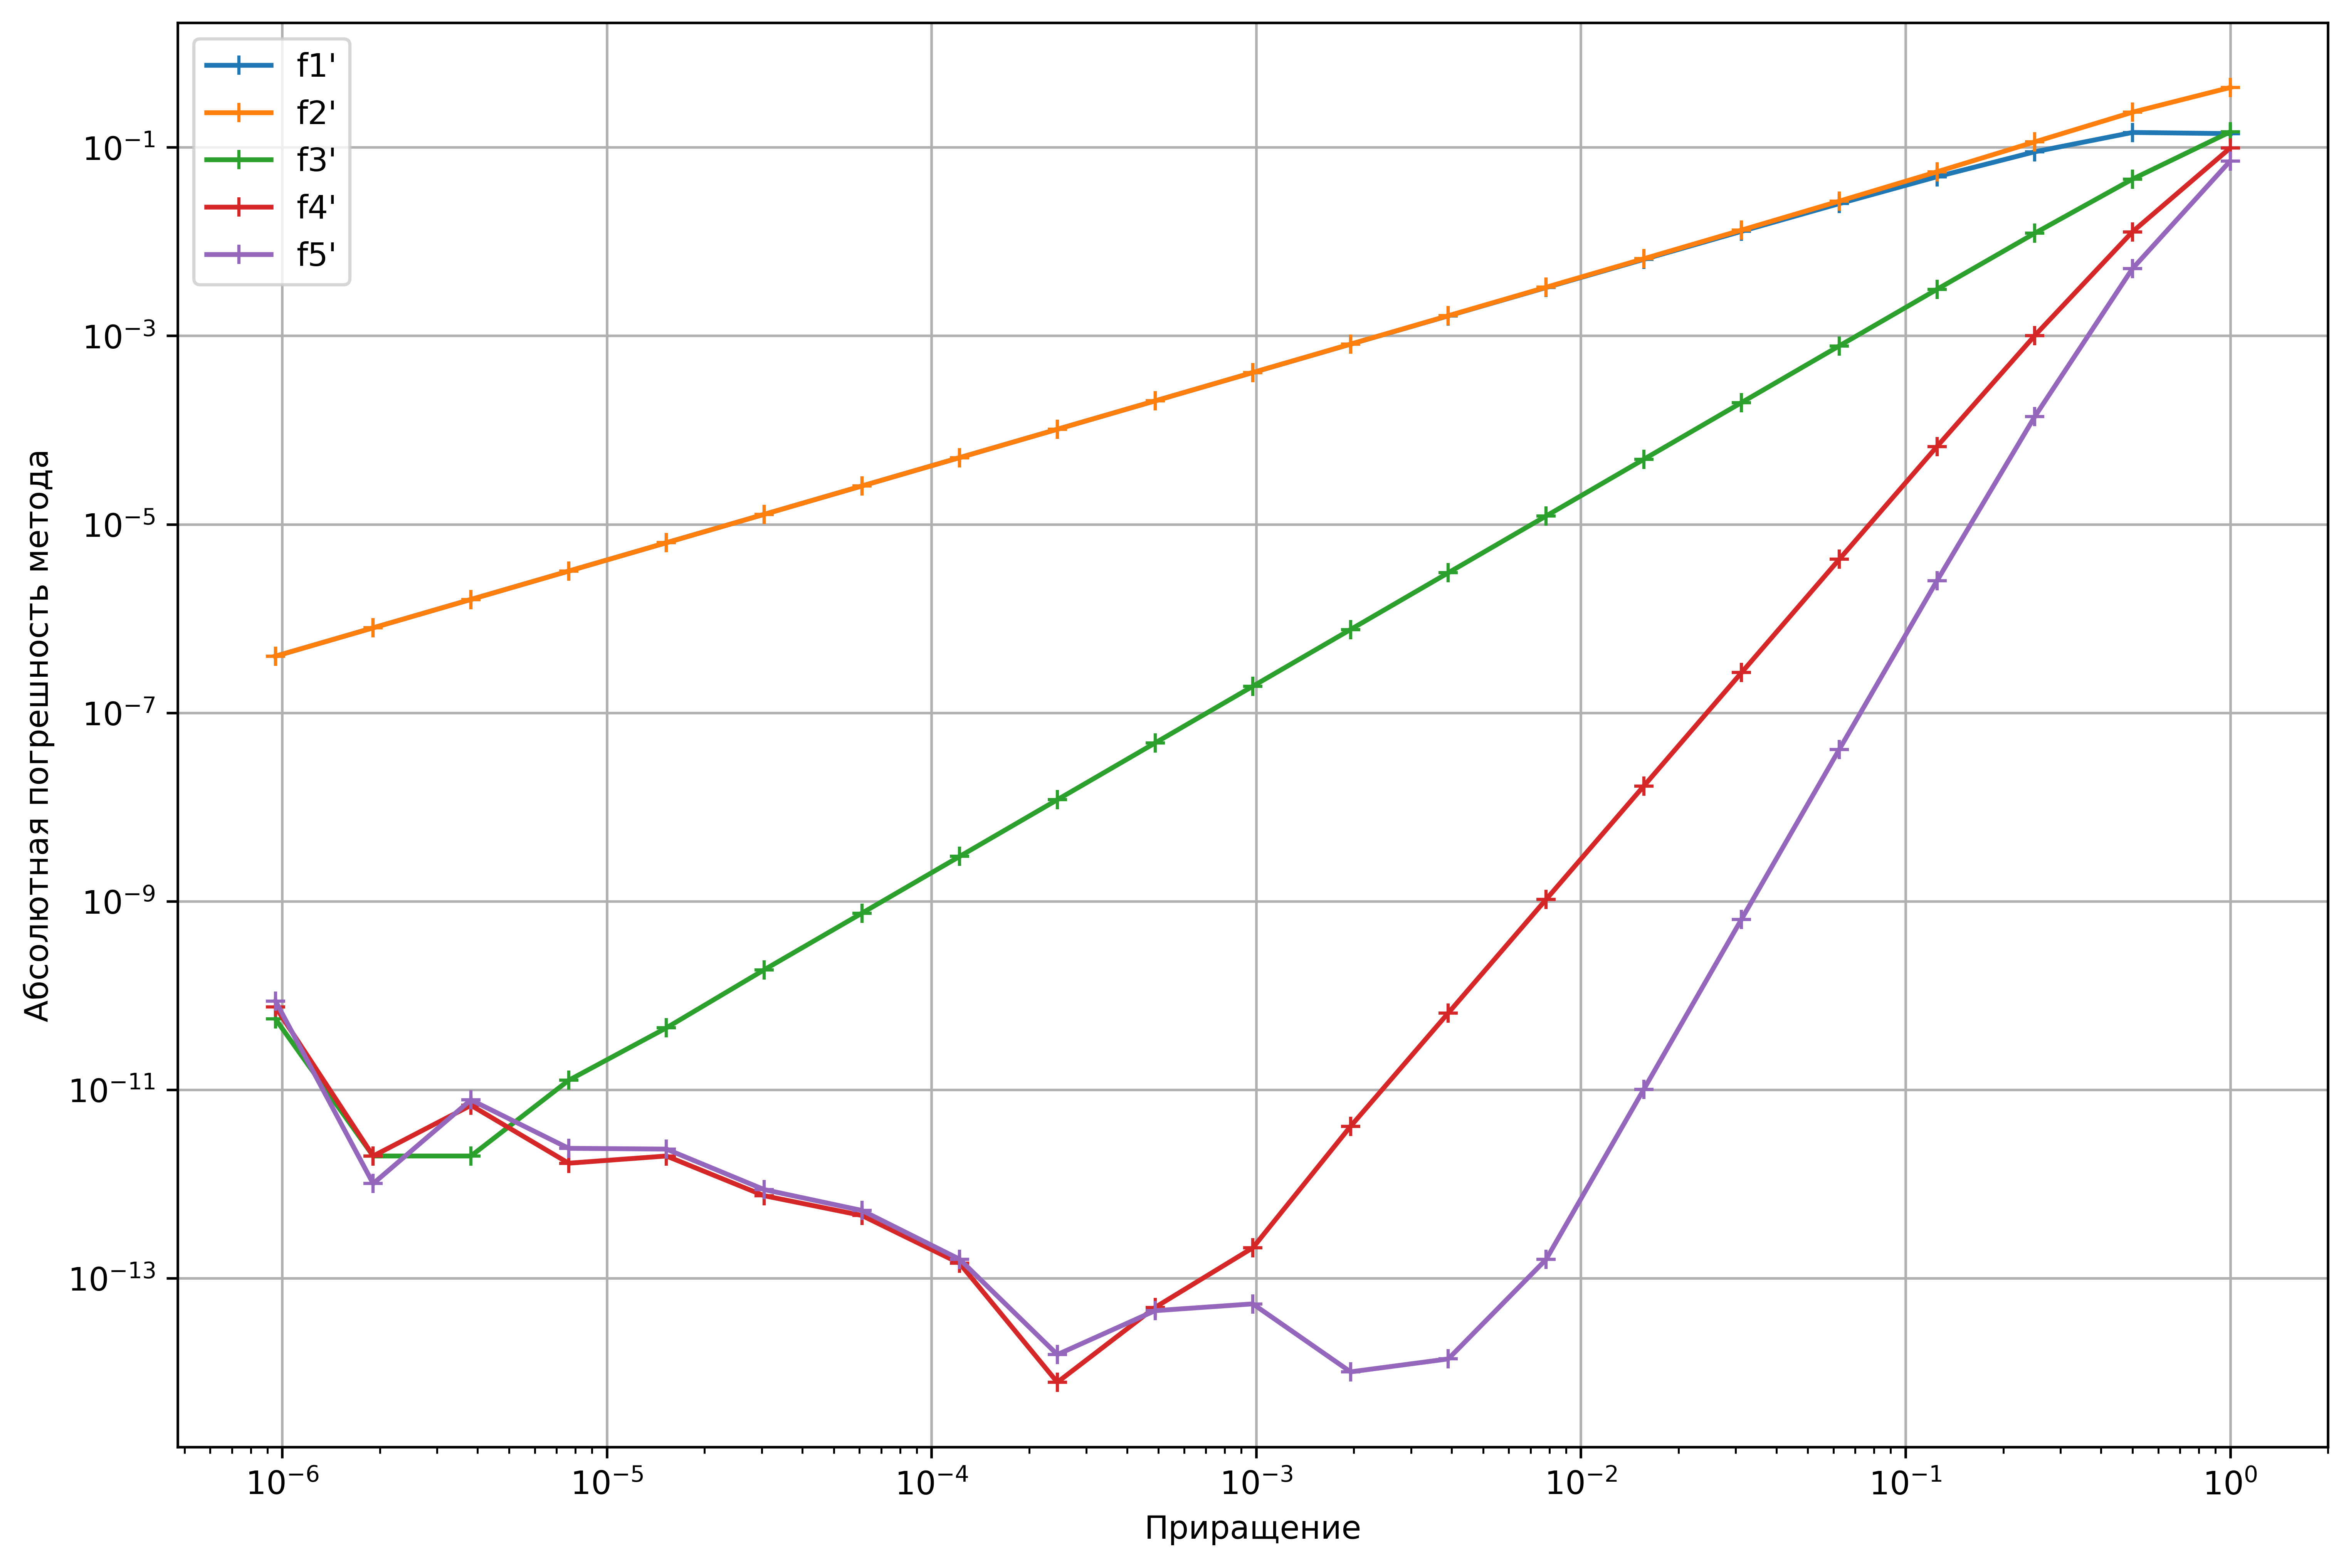

In [367]:
plt.figure(figsize = [12,8], dpi = 600)

plt.plot(h, delta2_1, marker = '+', label = "f1'")
plt.plot(h, delta2_2, marker = '+', label = "f2'")
plt.plot(h, delta2_3, marker = '+', label = "f3'")
plt.plot(h, delta2_4, marker = '+', label = "f4'")
plt.plot(h, delta2_5, marker = '+', label = "f5'")

plt.xlabel('Приращение')
plt.ylabel('Абсолютная погрешность метода')

plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.grid()
plt.show()

#### 3) $exp(sin(cos(x)))$
Функция $f_3 = exp(sin(cos(x)))$, ее производная $f'_3 = -sin(x)*cos(cos(x))*exp(sin(cos(x)))$

In [381]:
def f3(x):
    return np.exp(np.sin(np.cos(x)))

In [383]:
x3_0 = (15/360) * 2 * np.pi
der_t3 = -1 * np.exp(np.sin(np.cos(x3_0))) * np.sin(x3_0) * np.cos(np.cos(x3_0))

In [385]:
delta3_1 = [der_delta(f3, der1, x3_0, dx, der_t3) for dx in h]
delta3_2 = [der_delta(f3, der2, x3_0, dx, der_t3) for dx in h]
delta3_3 = [der_delta(f3, der3, x3_0, dx, der_t3) for dx in h]
delta3_4 = [der_delta(f3, der4, x3_0, dx, der_t3) for dx in h]    
delta3_5 = [der_delta(f3, der5, x3_0, dx, der_t3) for dx in h]

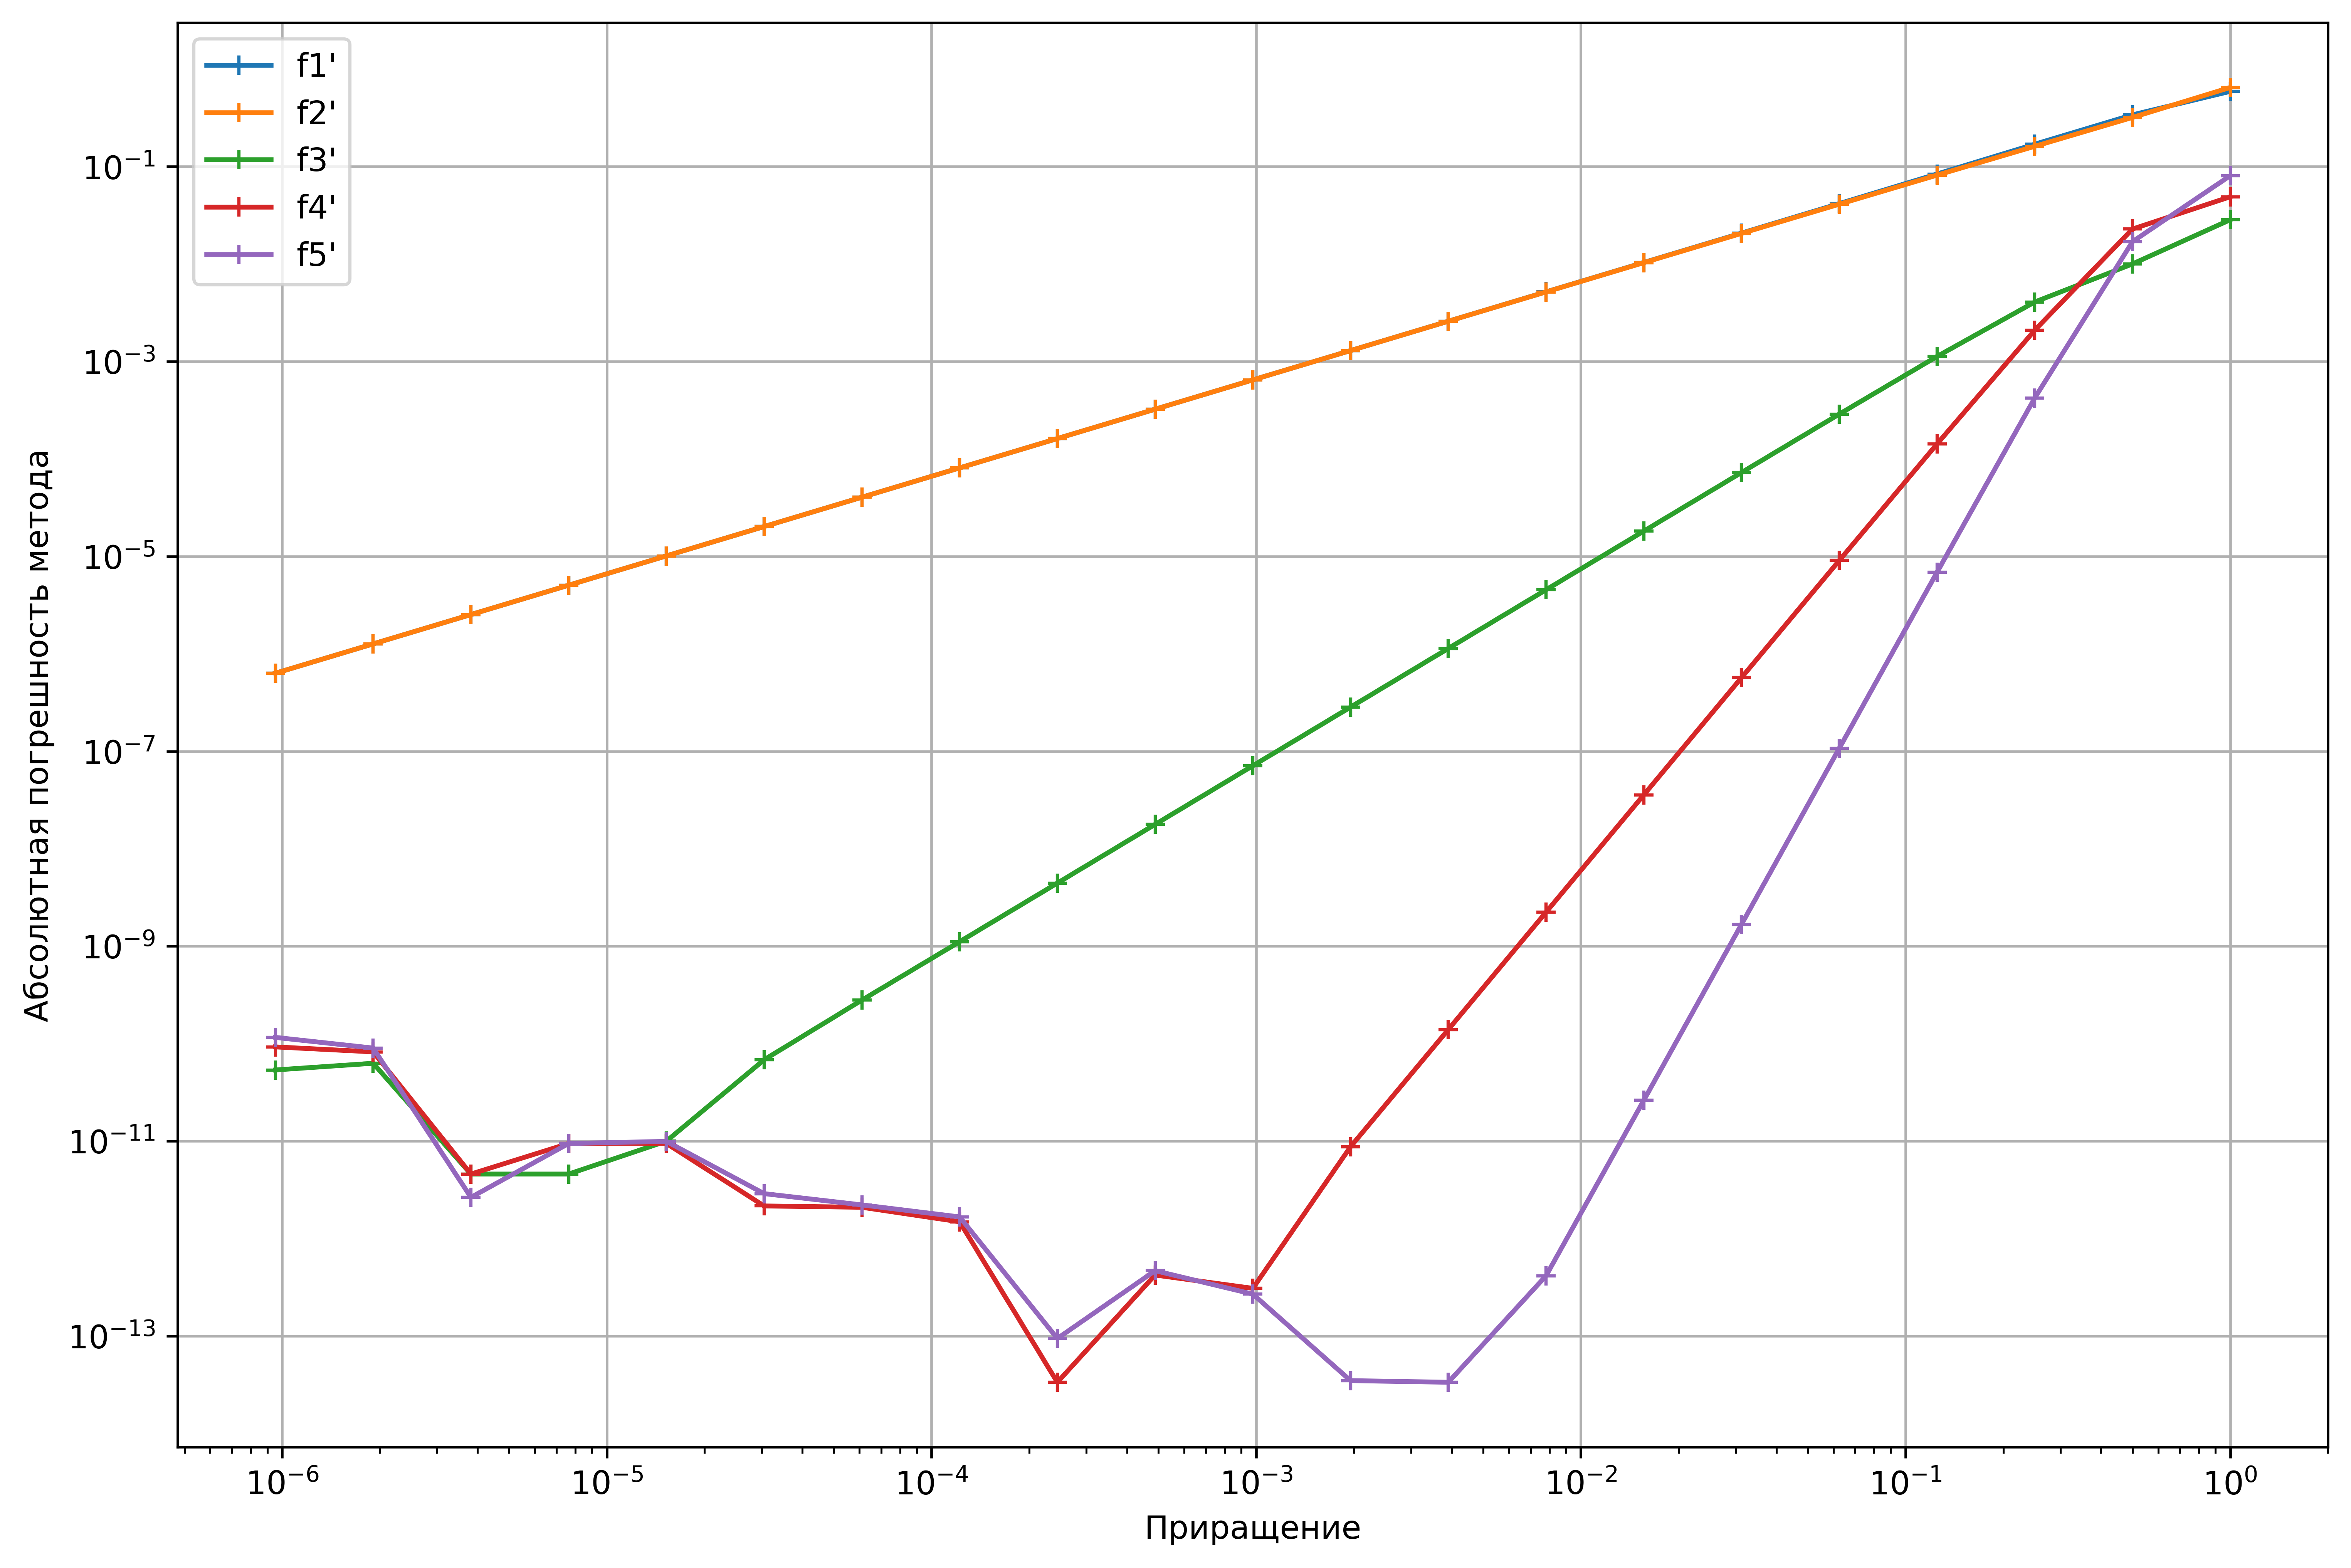

In [387]:
plt.figure(figsize = [12,8], dpi = 600)

plt.plot(h, delta3_1, marker = '+', label = "f1'")
plt.plot(h, delta3_2, marker = '+', label = "f2'")
plt.plot(h, delta3_3, marker = '+', label = "f3'")
plt.plot(h, delta3_4, marker = '+', label = "f4'")
plt.plot(h, delta3_5, marker = '+', label = "f5'")

plt.xlabel('Приращение')
plt.ylabel('Абсолютная погрешность метода')

plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.grid()
plt.show()

#### 4) $ln(x+3)$
Функция $f_4 = ln(x+3)$, ее производная $f'_4 = \frac{1}{x+3}$

In [395]:
def f4(x):
    return np.log(x + 3)

In [403]:
x4_0 = 2
der_t4 = 1/(x4_0 + 3)

In [405]:
delta4_1 = [der_delta(f4, der1, x4_0, dx, der_t4) for dx in h]
delta4_2 = [der_delta(f4, der2, x4_0, dx, der_t4) for dx in h]
delta4_3 = [der_delta(f4, der3, x4_0, dx, der_t4) for dx in h]
delta4_4 = [der_delta(f4, der4, x4_0, dx, der_t4) for dx in h]    
delta4_5 = [der_delta(f4, der5, x4_0, dx, der_t4) for dx in h]

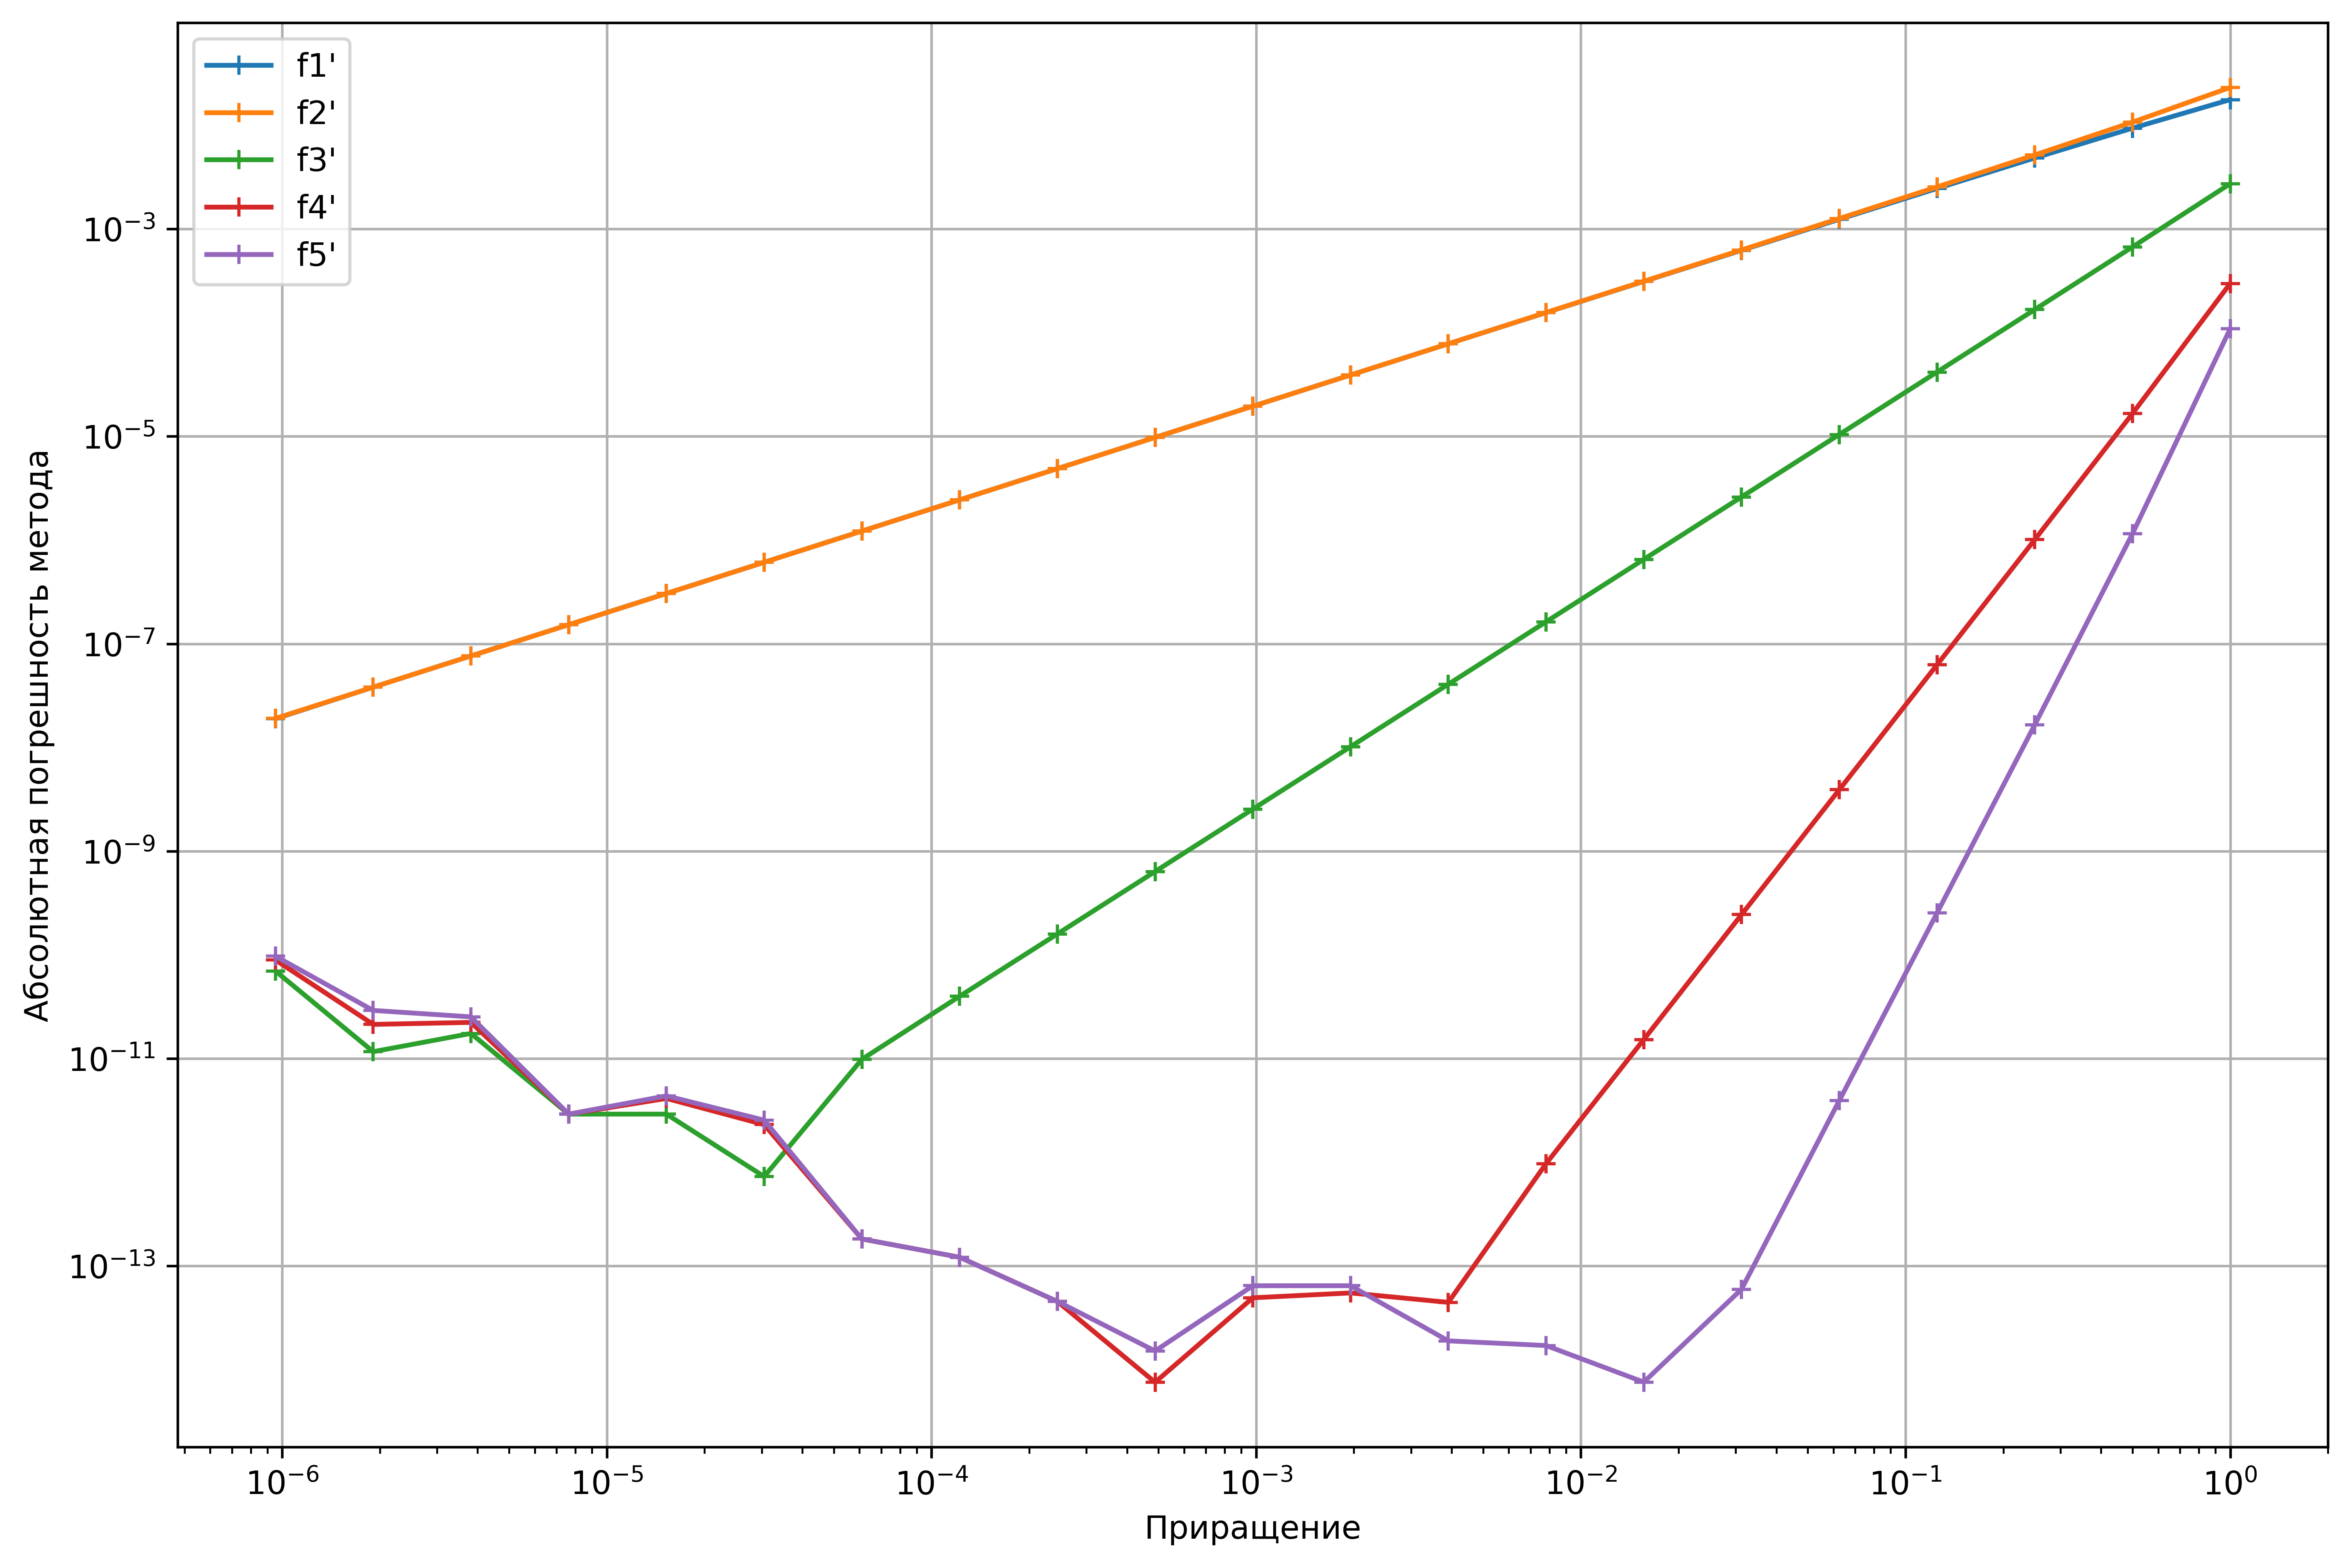

In [407]:
plt.figure(figsize = [12,8], dpi = 600)

plt.plot(h, delta4_1, marker = '+', label = "f1'")
plt.plot(h, delta4_2, marker = '+', label = "f2'")
plt.plot(h, delta4_3, marker = '+', label = "f3'")
plt.plot(h, delta4_4, marker = '+', label = "f4'")
plt.plot(h, delta4_5, marker = '+', label = "f5'")

plt.xlabel('Приращение')
plt.ylabel('Абсолютная погрешность метода')

plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.grid()
plt.show()

#### 5) $\sqrt{x+3}$
Функция $f_5= \sqrt{x+3}$, ее производная $f'_5 = \frac{1}{2\sqrt{x+3}}$

In [409]:
def f5(x):
    return np.sqrt(x + 3)

In [415]:
x5_0 = 5
der_t5 = 1/ (2 * np.sqrt(x5_0 + 3))

In [417]:
delta5_1 = [der_delta(f5, der1, x5_0, dx, der_t5) for dx in h]
delta5_2 = [der_delta(f5, der2, x5_0, dx, der_t5) for dx in h]
delta5_3 = [der_delta(f5, der3, x5_0, dx, der_t5) for dx in h]
delta5_4 = [der_delta(f5, der4, x5_0, dx, der_t5) for dx in h]    
delta5_5 = [der_delta(f5, der5, x5_0, dx, der_t5) for dx in h]

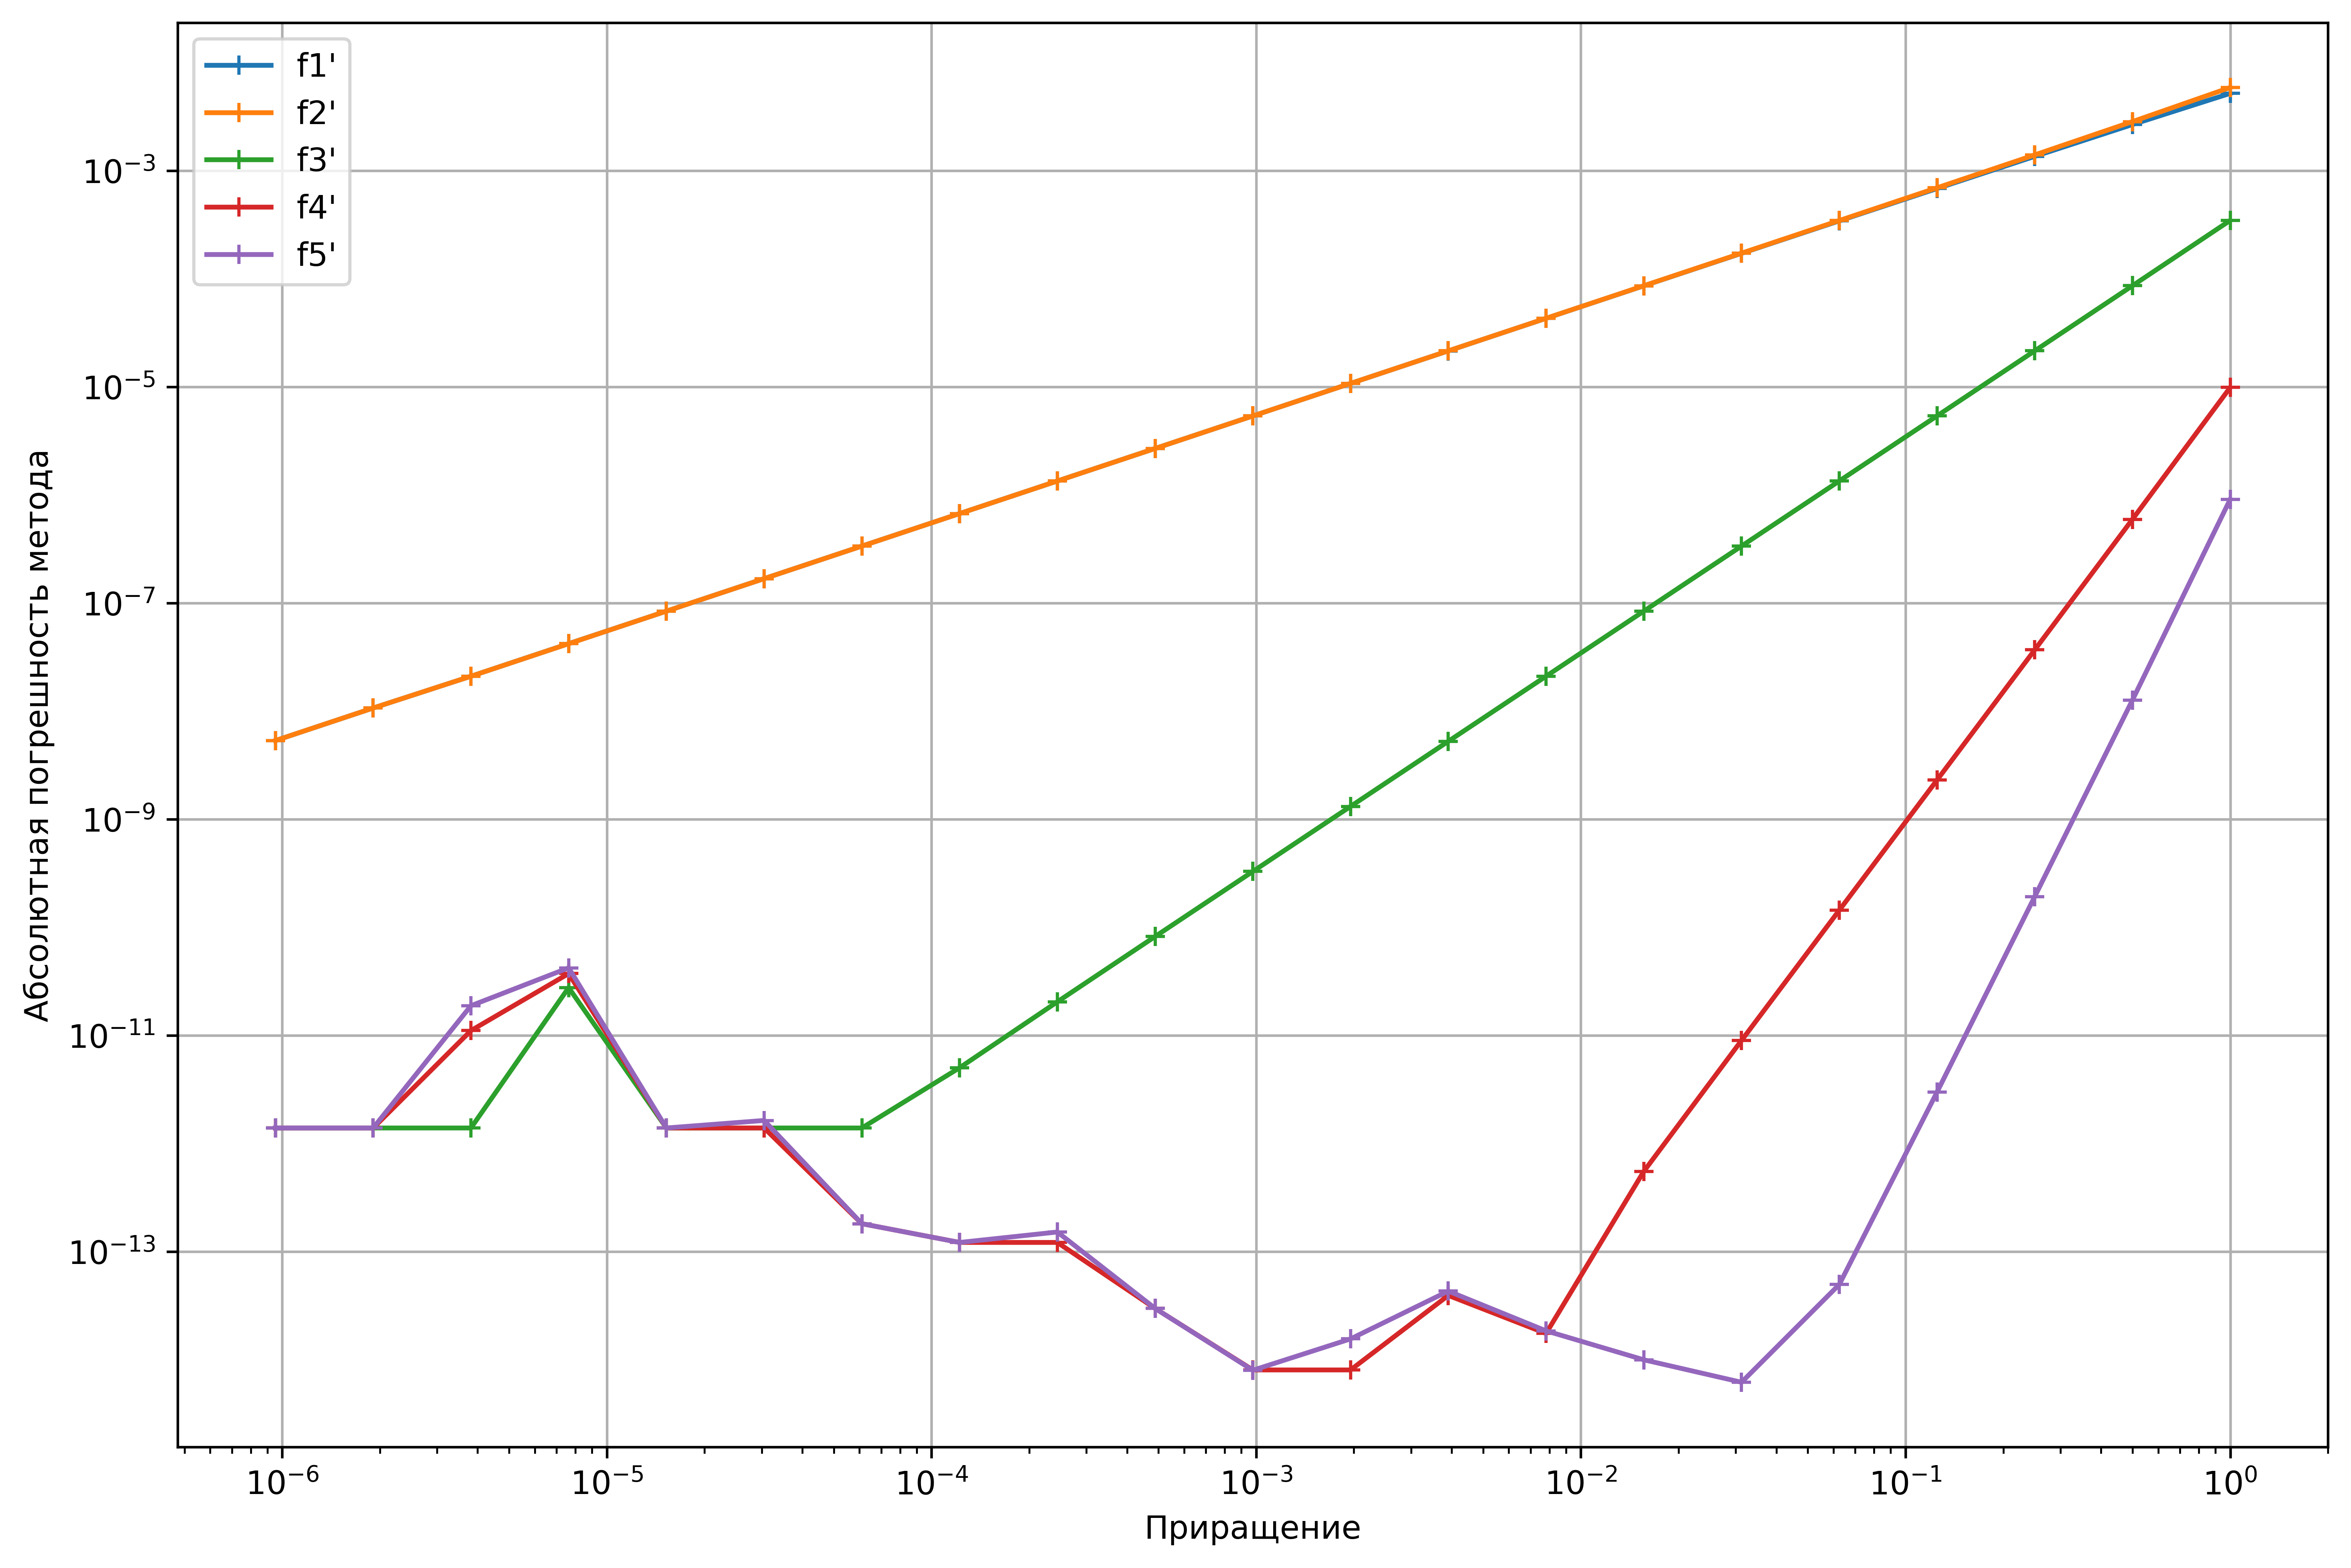

In [419]:
plt.figure(figsize = [12,8], dpi = 600)

plt.plot(h, delta5_1, marker = '+', label = "f1'")
plt.plot(h, delta5_2, marker = '+', label = "f2'")
plt.plot(h, delta5_3, marker = '+', label = "f3'")
plt.plot(h, delta5_4, marker = '+', label = "f4'")
plt.plot(h, delta5_5, marker = '+', label = "f5'")

plt.xlabel('Приращение')
plt.ylabel('Абсолютная погрешность метода')

plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.grid()
plt.show()

### Вывод
По графикам можно определить, что зависимости линейные до определенного момента. Нелинейность возникает при достаточно малых значениях ошибки, возникает машинная погрешность. Стремление $h$ к нулю не имеет смысла, т.к. для некоторых методов ошибка начинает только расти.